Data Types of Attributes:
Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object
Missing Values before imputation:
Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64

Missing Values after imputation:
Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64

Class Balance:
Class Label
1    0.502306
0    0.324316
2    0.173378
Name: proportion, dtype: float64

Correlation Matrix:
             Class Label        f0        f1        f2        f3        f4  

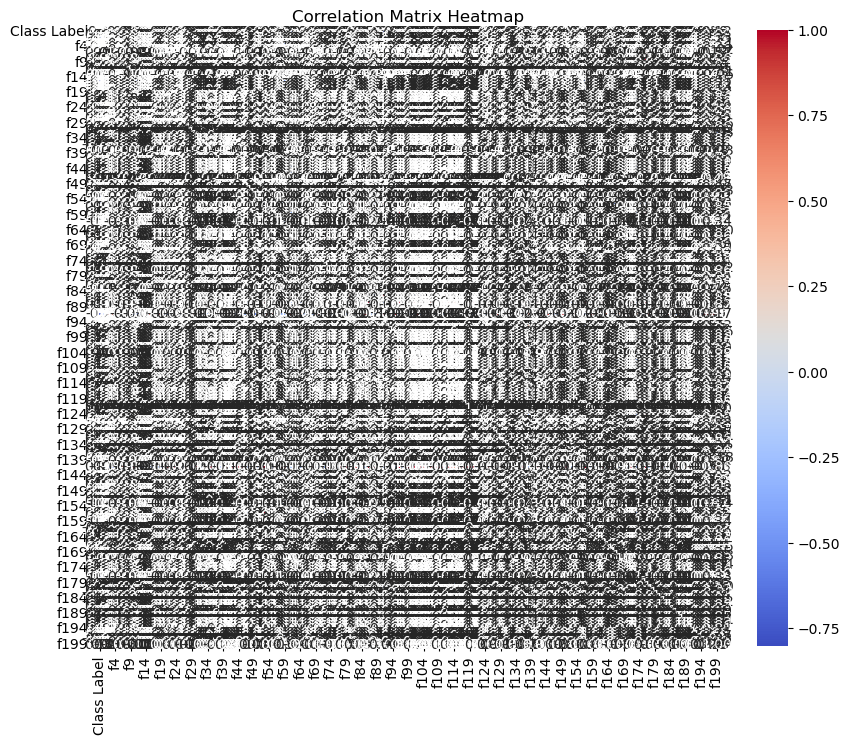


Matrix Rank (Dimensionality of Data): 175

Data Range and Normalization:
Class Label       2.000000
f0              781.789490
f1              459.207794
f2              536.879639
f3              760.753845
                  ...     
f195            750.316284
f196            571.680176
f197             31.048813
f198            505.643402
f199           1758.735840
Length: 201, dtype: float64
Error with kNN: name 'precision_socre' is not defined
Error with Decision Tree: name 'precision_socre' is not defined
Error with SVM: name 'precision_socre' is not defined
Error with Random Forest: name 'precision_socre' is not defined
Error with Naive Bayes: name 'precision_socre' is not defined

Model Evaluation Results:
Empty DataFrame
Columns: []
Index: []


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
# Load the dataset
df = pd.read_csv("C://Users//Admin//Downloads//Custom_CNN_Features.csv")

#Ensure essential columns exist
if 'Filename' not in df.columns or 'Class Label' not in df.columns:
    raise ValueError("The dataset must contain 'Filename' and 'Class Label' columns.")
    
# 1. Data Types of Attributes
print("Data Types of Attributes:")
print(df.dtypes)

# 2. Missing Values Check and Imputation
print("Missing Values before imputation:")
print(df.isnull().sum())

# Impute missing values for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Impute missing values for non-numeric columns (if any)
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])

# Check missing values after imputation
print("\nMissing Values after imputation:")
print(df.isnull().sum())

# 3. Class Balance
print("\nClass Balance:")
if 'Class Label' in df.columns:
    print(df['Class Label'].value_counts(normalize=True))

# 4. Attribute Correlation Study
print("\nCorrelation Matrix:")

numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] > 1:
    corr_matrix = numeric_df.corr()
    print(corr_matrix)

    # Plot the heatmap of the correlation matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# 5. Matrix Rank Study (Dimensionality of Data)
rank = np.linalg.matrix_rank(df.select_dtypes(include=[np.number]))
print(f"\nMatrix Rank (Dimensionality of Data): {rank}")

# 6. Data Range and Normalization
print("\nData Range and Normalization:")
# Calculate the range (max - min) for each feature
data_range = df[numeric_columns].max() - df[numeric_columns].min()
print(data_range)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Optional: Z-Score Normalization
df_zscore = df.copy()
df_zscore[numeric_columns] = df[numeric_columns].apply(zscore)


# Prepare the feature and target variables
X = df.drop(columns=['Filename', 'Class Label'])
y = df['Class Label']

# Split the dataset into training and testing sets (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Dictionary to store results for each classifier
results = {}

# List of classifiers to evaluate
classifiers = {
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),  # Enable probability estimates for ROC-AUC
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Loop through classifiers, train, and evaluate
for clf_name, clf in classifiers.items():
    try: 
        # Measure training time
        start_train = time.time()
        clf.fit(X_train, y_train)
        end_train = time.time()
        training_time = end_train - start_train

        # Measure classification time on test data
        start_test = time.time()
        y_test_pred = clf.predict(X_test)
        end_test = time.time()
        classification_time = end_test - start_test
        
        # Metrics on Training Set
        y_train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
        train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

        # Metrics on Test Set
        y_test_pred = clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_socre(y_test, y_test_pred, average='weighted', zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
        
        # Check Overfitting/Underfitting
        if train_accuracy > 0.9 and (train_accuracy - test_accuracy) > 0.2:
            fit_status = "Overfit"
        elif train_accuracy < 0.6 and test_accuracy < 0.6:
            fit_status = "Underfit"
        else:
            fit_status = "Regular Fit"
            
        # Store results
        results[clf_name] = {
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Train Precision': train_precision,
            'Test Precision': test_precision,
            'Train Recall': train_recall,
            'Test Recall': test_recall,
            'Train F1-Score': train_f1,
            'Test F1-Score': test_f1,
            'AUROC': auroc,
            'Fit Status': fit_status
    }
    except Exception as e:
        print(f"Error with {clf_name}: {e}")

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)
